In [3]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd


In [4]:
# Load and preprocess MNIST data
trainPath = "D:\Work\python\dl_clg\datasets\dl1\mnist_train.csv"
testPath = "D:\Work\python\dl_clg\datasets\dl1\mnist_test.csv"

x_train = pd.read_csv(trainPath)
x_test = pd.read_csv(testPath)



In [5]:
x_train.head(2)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# x_train.drop_columns(['label'])
x_train = x_train.drop(columns=['label']).values
x_test = x_test.drop(columns=['label']).values

# (x_train, _), (x_test, _) = mnist.load_data()



AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [8]:
# x_train.shape
# reshape data
x_train = np.reshape(x_train , (-1,28,28,1))
x_test = np.reshape(x_test , (-1,28,28,1))

In [9]:
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

In [16]:
# Build the autoencoder model
latent_dim = 64  # Size of the encoded representation
# from keras import regularizers

# Encoder
input_img = layers.Input(shape=(28, 28, 1))
x = layers.Flatten()(input_img)
x = layers.Dense(128, activation="relu")(x)
# encoded = layers.Dense(latent_dim, activation="sigmoid", 
#                        activity_regularizer=kl_divergence_regularizer(rho))(x)
encoded = layers.Dense(latent_dim, activation="sigmoid", activity_regularizer=regularizers.l1(0.0001))(x)


# Decoder
x = layers.Dense(128, activation="relu")(encoded)
x = layers.Dense(28 * 28, activation="sigmoid")(x)
decoded = layers.Reshape((28, 28, 1))(x)



In [17]:
# Autoencoder model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))


Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.2847 - val_loss: 0.2362
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2095 - val_loss: 0.1854
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1710 - val_loss: 0.1556
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1485 - val_loss: 0.1387
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1344 - val_loss: 0.1292
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1267 - val_loss: 0.1219
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1200 - val_loss: 0.1159
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1142 - val_loss: 0.1097
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1084 - val_loss: 0.1050
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1044 - val_loss: 0.1015

1/1 [==============================] - 0s 145ms/step


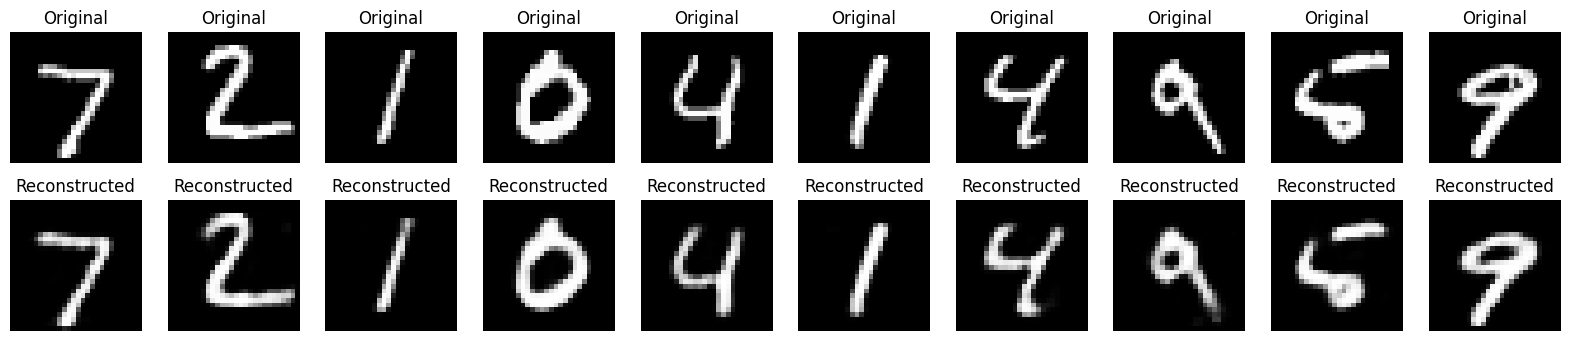

In [18]:
import matplotlib.pyplot as plt

# Generate reconstructed images
n = 10  # Number of images to display
original_images = x_test[:n]
reconstructed_images = autoencoder.predict(original_images)

# Plot the original and reconstructed images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(original_images[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")
    
    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()
